In [1]:
import pandas as pd
import numpy as np
#import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
#import pydotplus
from matplotlib import rcParams
import seaborn as sns

from collections import Counter

In [2]:
df1 = pd.read_csv('Churn1.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
c_AreaCode               4617 non-null int64
c_InternationalPlan      4617 non-null int64
c_State                  4617 non-null object
c_VMailPlan              4617 non-null int64
q_AccountLength          4617 non-null int64
q_CustServCalls          4617 non-null int64
q_DayCalls               4617 non-null int64
q_DayCharge              4617 non-null float64
q_DayMins                4617 non-null float64
q_EveCalls               4617 non-null int64
q_EveCharge              4617 non-null float64
q_EveMins                4617 non-null float64
q_InternationalCharge    4617 non-null float64
q_InternationalMins      4617 non-null float64
q_Internationalcalls     4617 non-null int64
q_NightCalls             4617 non-null int64
q_NightCharge            4617 non-null float64
q_NightMins              4617 non-null float64
q_VMailMessage           4617 non-null int64
y_Churn              

In [4]:
df1.head()

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn
0,415,0,KS,1,128,1,110,45.07,265.1,99,16.78,197.4,2.70,10.0,3,91,11.01,244.7,25,0
1,415,0,OH,1,107,1,123,27.47,161.6,103,16.62,195.5,3.70,13.7,3,103,11.45,254.4,26,0
2,415,0,NJ,0,137,0,114,41.38,243.4,110,10.30,121.2,3.29,12.2,5,104,7.32,162.6,0,0
3,408,1,OH,0,84,2,71,50.90,299.4,88,5.26,61.9,1.78,6.6,7,89,8.86,196.9,0,0
4,415,1,OK,0,75,3,113,28.34,166.7,122,12.61,148.3,2.73,10.1,3,121,8.41,186.9,0,0


In [5]:
# Categorise varibales
CatVarList = ['c_AreaCode', 'c_InternationalPlan', 'c_State','c_VMailPlan']
ConVarList = ['q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayCharge',
              'q_DayMins', 'q_EveCalls', 'q_EveCharge', 'q_EveMins',
              'q_InternationalCharge', 'q_InternationalMins', 'q_Internationalcalls',
              'q_NightCalls', 'q_NightCharge', 'q_NightMins', 'q_VMailMessage']
OutVarList = ['y_Churn']

## Checking normality of variables - to understand  the requirment of tranforming the variables

In [6]:
#checking the distribution of variables-normal distrubition(-1.96 to +1.96)
for i in ConVarList:
    print('skewness and Kurtosis for '+ str(i)+': '+str(stats.skew(df1[i]))+' and '+ str(stats.kurtosis(df1[i])))

skewness and Kurtosis for q_AccountLength: 0.10621316744599318 and -0.0937513108437864
skewness and Kurtosis for q_CustServCalls: 1.0464601992374216 and 1.512086924300303
skewness and Kurtosis for q_DayCalls: -0.08098712687907403 and 0.19463514964618556
skewness and Kurtosis for q_DayCharge: -0.0029508087758798626 and -0.04351742102672107
skewness and Kurtosis for q_DayMins: -0.002947284016695239 and -0.04365222612737929
skewness and Kurtosis for q_EveCalls: -0.01754836130740179 and 0.13453389767071755
skewness and Kurtosis for q_EveCharge: -0.005250110884106289 and 0.042175304917122514
skewness and Kurtosis for q_EveMins: -0.0052781500846280525 and 0.042283656150823745
skewness and Kurtosis for q_InternationalCharge: -0.22127033177212463 and 0.6704905004546964
skewness and Kurtosis for q_InternationalMins: -0.22081880952903746 and 0.6695756138404381
skewness and Kurtosis for q_Internationalcalls: 1.3659756765088018 and 3.2980521818291813
skewness and Kurtosis for q_NightCalls: 0.03087

## Box plot of all the varibles - to analyse the possibility of scaling

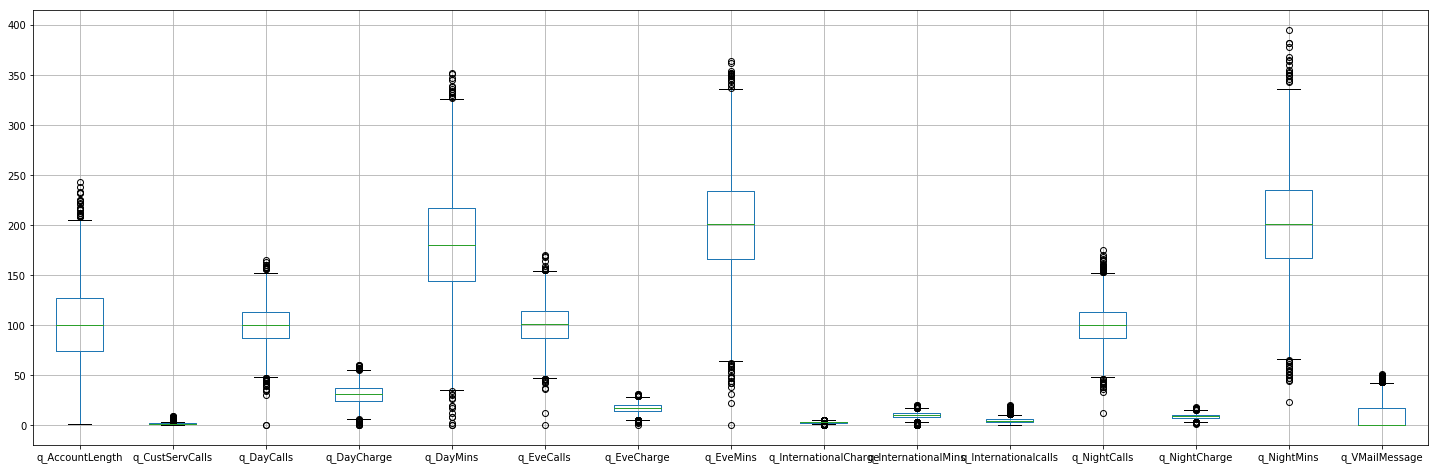

In [9]:
##### the magnitude of variations between varibales is  huge. So scaling of variablesas a part of preprocessing. TBD later
plt.figure(figsize=(25,8))
df1[ConVarList].boxplot()


## Basic Pie chart of outcome variable

0    3961
1     656
Name: y_Churn, dtype: int64


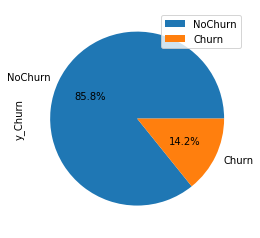

In [10]:
#The data consist of 85% nochurn and 14% churn.Note:Smoting needs to be included as a part of preprocessing.
target_Count = df1.y_Churn.value_counts()
print(target_Count)
target_Count.plot.pie(labels=["NoChurn","Churn"],legend = True, autopct='%1.1f%%',shadow=False)

## Analysing Account length

In [11]:
# Analysing Account length
df1['q_AccountLength'].describe()

count    4617.000000
mean      100.645224
std        39.597194
min         1.000000
25%        74.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: q_AccountLength, dtype: float64

In [12]:
# Converting Account length into 13 bins each of size 20 days. Check the frequency of each bin
custom_bucket_array = np.linspace(0, 260, 14)
print(custom_bucket_array)
df1['q_AccountLength_bins'] = pd.cut(df1['q_AccountLength'],custom_bucket_array)
print(df1['q_AccountLength_bins'].value_counts().sort_index())
Counter(df1['q_AccountLength_bins'])

[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200. 220. 240. 260.]
(0.0, 20.0]        93
(20.0, 40.0]      204
(40.0, 60.0]      425
(60.0, 80.0]      709
(80.0, 100.0]     893
(100.0, 120.0]    887
(120.0, 140.0]    697
(140.0, 160.0]    378
(160.0, 180.0]    219
(180.0, 200.0]     80
(200.0, 220.0]     21
(220.0, 240.0]     10
(240.0, 260.0]      1
Name: q_AccountLength_bins, dtype: int64


Counter({Interval(120.0, 140.0, closed='right'): 697,
         Interval(100.0, 120.0, closed='right'): 887,
         Interval(80.0, 100.0, closed='right'): 893,
         Interval(60.0, 80.0, closed='right'): 709,
         Interval(140.0, 160.0, closed='right'): 378,
         Interval(160.0, 180.0, closed='right'): 219,
         Interval(40.0, 60.0, closed='right'): 425,
         Interval(0.0, 20.0, closed='right'): 93,
         Interval(20.0, 40.0, closed='right'): 204,
         Interval(180.0, 200.0, closed='right'): 80,
         Interval(200.0, 220.0, closed='right'): 21,
         Interval(220.0, 240.0, closed='right'): 10,
         Interval(240.0, 260.0, closed='right'): 1})

### Analyse Churn vs Account Length

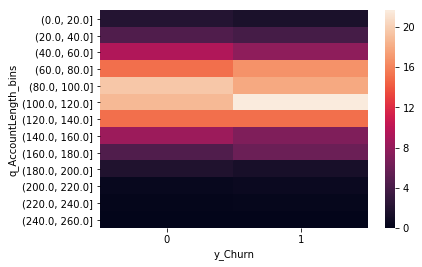

In [13]:
# Heat map of Churn Vs Account length
Crosstab_AL=pd.crosstab(df1.q_AccountLength_bins, df1.y_Churn,normalize = 'columns').round(6)*100
sns.heatmap(Crosstab_AL)

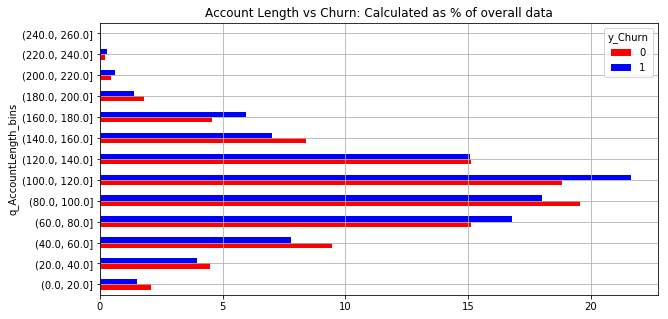

In [14]:
# Show the churn has happened in for account lengths in durations 60 to 140 days. Higher churn is in range of 100-120 days.
rcParams["figure.figsize"]= 10,5
Crosstab_AL.plot(kind='barh', stacked=False, color=['red','blue'], grid=True, title="Account Length vs Churn: Calculated as % of overall data")

### Analyse Churn Vs Area code

y_Churn           0        1
c_AreaCode                  
408         25.1452  25.1524
415         50.0126  48.4756
510         24.8422  26.3720


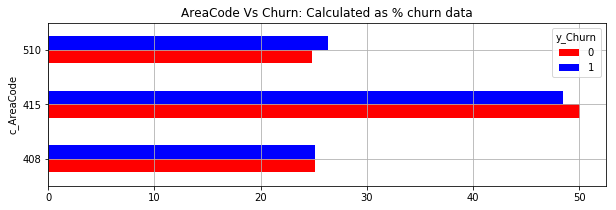

In [15]:
# For churn = True: The 48% were from area code 415. i.e 415 has higher % of churn compared to other area codes
rcParams["figure.figsize"] =10,3
Crosstab_Area = pd.crosstab(df1.c_AreaCode, df1.y_Churn,normalize = 'columns').round(6)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="AreaCode Vs Churn: Calculated as % churn data")

### Analyse International plan (Categorical) and Churn data

y_Churn                   0        1
c_InternationalPlan                 
0                    93.436  71.6463
1                     6.564  28.3537


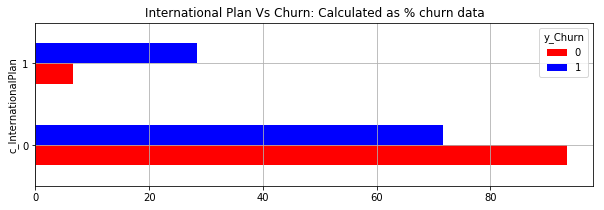

In [16]:
#People opted for Int Plan seem to churn high -29% as compared to people opted and no churn -6%
#Implies that review needs to be done for internatinal plan
rcParams['figure.figsize'] = 10,3
Crosstab_IntP =  pd.crosstab(df1.c_InternationalPlan, df1.y_Churn,  normalize = 'columns').round(6)*100
print(Crosstab_IntP)
Crosstab_IntP.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="International Plan Vs Churn: Calculated as % churn data")

### Analyse Churn Vs State

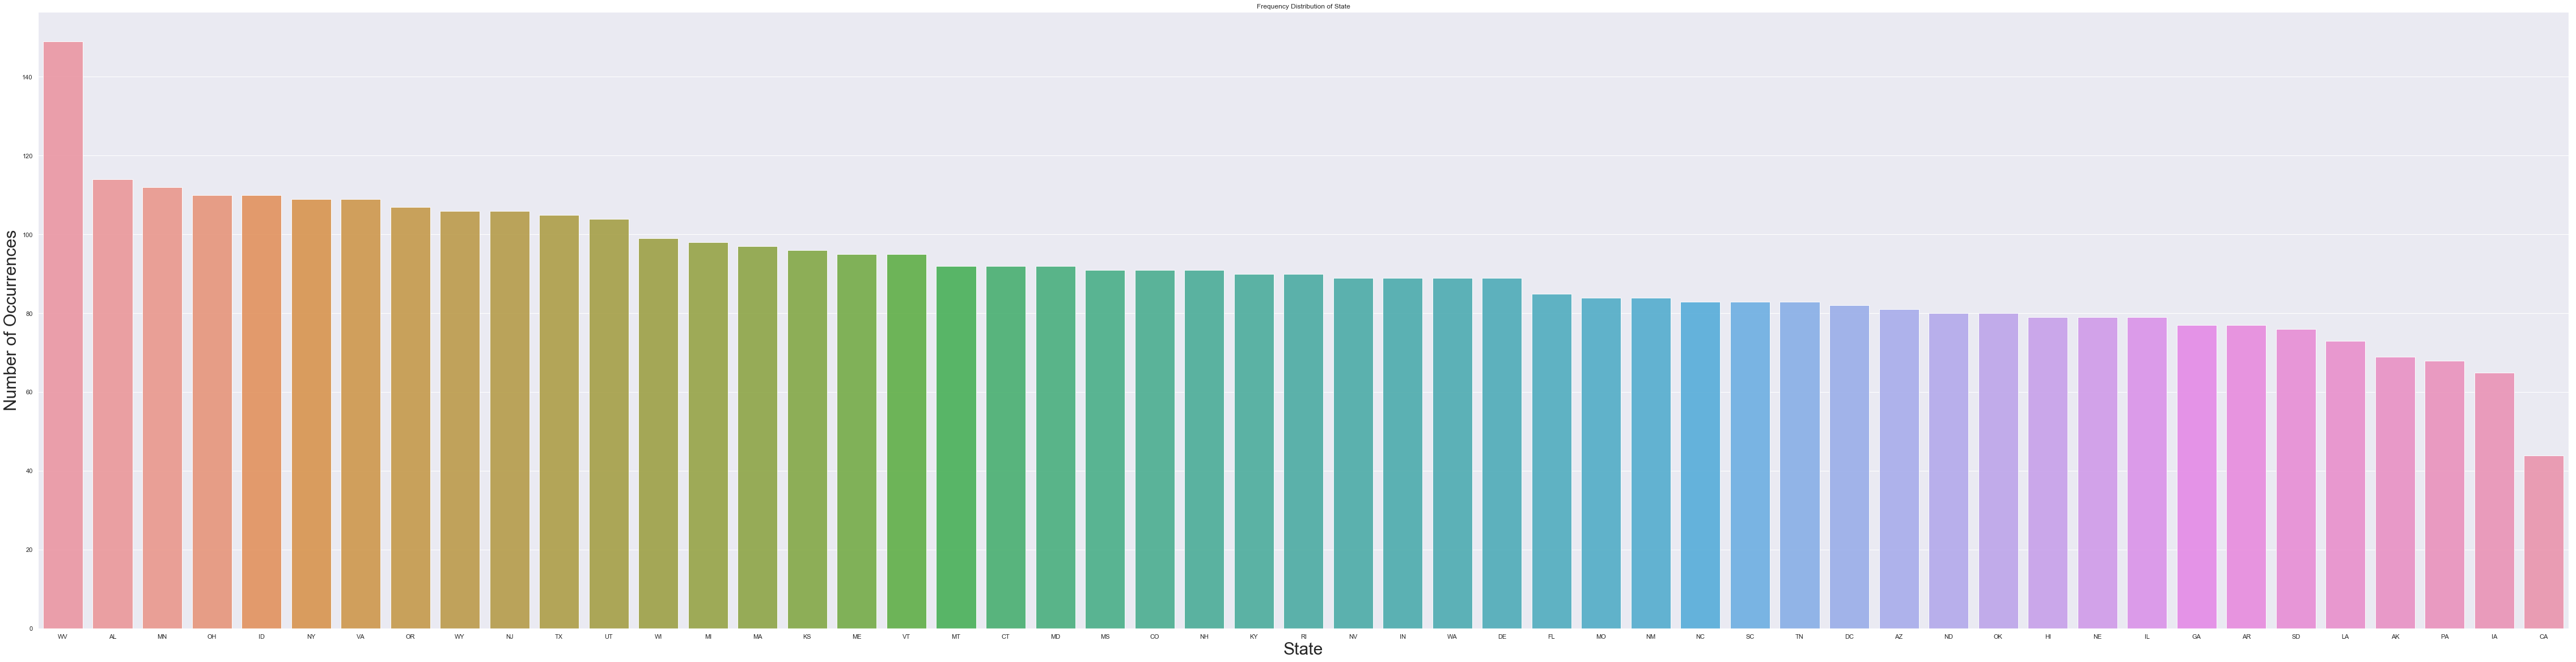

In [10]:
#data from state WV is high 
rcParams['figure.figsize'] =80,20
state_count= df1.c_State.value_counts()
#print(state_count)
sns.set(style="darkgrid")
sns.barplot(state_count.index, state_count.values, alpha=0.9)
plt.title('Frequency Distribution of State')
plt.ylabel('Number of Occurrences', fontsize=30)
plt.xlabel('State', fontsize=30)
plt.show()

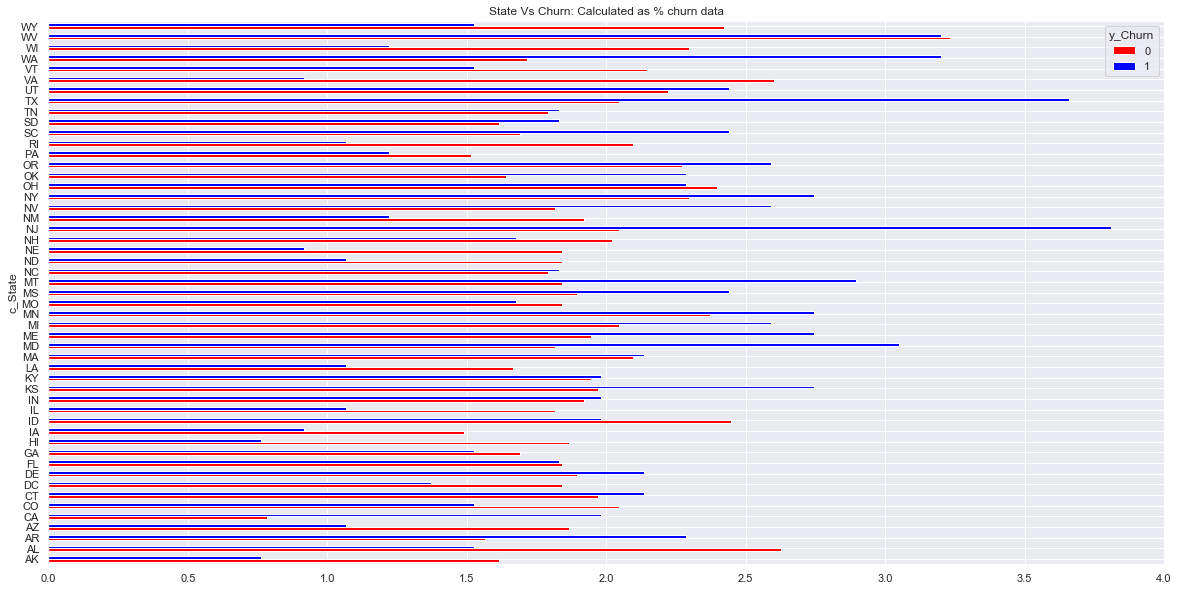

In [37]:
# For churn = True: quite a few states with high churn rate. Services to be reviewed in those states with 
# Churn Rate more than 2% and special care in states of with more than 3%
rcParams['figure.figsize'] =20,10
Crosstab_State =  pd.crosstab(df1.c_State, df1.y_Churn,normalize = 'columns').round(6)*100
#print(Crosstab_State)
Crosstab_State.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="State Vs Churn: Calculated as % churn data")

### Analyse Churn Vs Voice message plan

y_Churn            0        1
c_VMailPlan                  
0            71.2446  85.2134
1            28.7554  14.7866


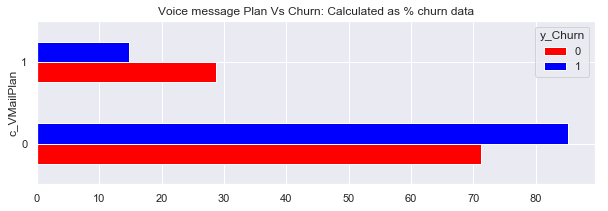

In [18]:
# For churn = True: People with no VM plan are 86% and with VM its 14% .This is a area of concern. 
# Implies They should sell more of Voice Message plan to reduce churn
rcParams['figure.figsize'] =10,3
Crosstab_VMPlan = pd.crosstab(df1.c_VMailPlan, df1.y_Churn,normalize = 'columns').round(6)*100
print(Crosstab_VMPlan)
Crosstab_VMPlan.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="Voice message Plan Vs Churn: Calculated as % churn data")

### Voice mail, International plan Vs Churn

y_Churn                                0        1
c_VMailPlan c_InternationalPlan                  
0           0                    66.7508  63.4146
            1                     4.4938  21.7988
1           0                    26.6852   8.2317
            1                     2.0702   6.5549


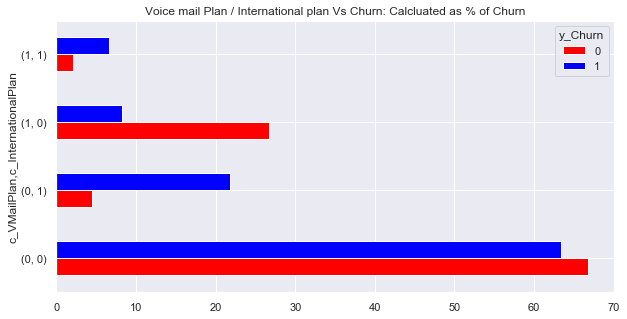

In [39]:
# For Churn = True 85.2% dont have VM plan and 63.4% dont have IPlan
#concentration should be given to encourage more voice mail plans and review needs to done for international plan 
rcParams['figure.figsize'] =10,5
Crosstab_VMP_IP = pd.crosstab([df1.c_VMailPlan,df1.c_InternationalPlan], df1.y_Churn,normalize='columns').round(6)*100
print(Crosstab_VMP_IP)
Crosstab_VMP_IP.plot(kind='barh', stacked=False, color=['red','blue'], grid=True, title="Voice mail Plan / International plan Vs Churn: Calcluated as % of Churn")

### Voice Mail and Area Code Vs Churn

y_Churn                       0        1
c_VMailPlan c_AreaCode                  
0           408         18.3035  20.8841
            415         35.1426  42.0732
            510         17.7985  22.2561
1           408          6.8417   4.2683
            415         14.8700   6.4024
            510          7.0437   4.1159


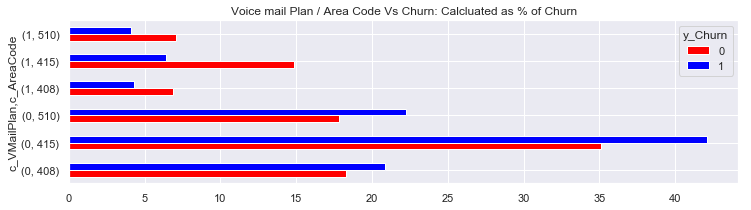

In [40]:
# For Churn = True; 42 % of churn is from area code 415 and no voice mail plan
rcParams['figure.figsize'] =12,3
Crosstab_VMP_AC = pd.crosstab([df1.c_VMailPlan,df1.c_AreaCode], df1.y_Churn,normalize='columns').round(6)*100
print(Crosstab_VMP_AC)
Crosstab_VMP_AC.plot(kind='barh', stacked=False, color=['red','blue'],grid=True,title="Voice mail Plan / Area Code Vs Churn: Calcluated as % of Churn")

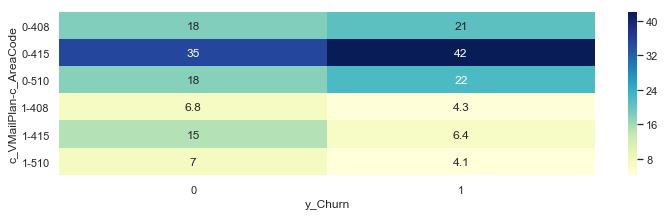

In [41]:
sns.heatmap(Crosstab_VMP_AC,cmap="YlGnBu", annot=True)

### Churn Vs Service calls

y_Churn                0        1
q_CustServCalls                  
0                21.0805  17.6829
1                37.2381  26.8293
2                23.2012  17.0732
3                13.9106   9.9085
4                 3.2820  15.8537
5                 0.8584   8.3841
6                 0.2525   2.7439
7                 0.1515   1.0671
8                 0.0252   0.1524
9                 0.0000   0.3049


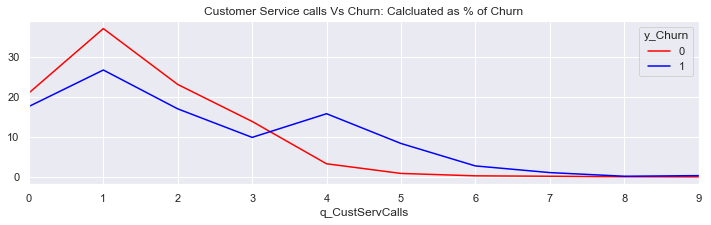

In [42]:
### After ~3 calls, the churn rate spikes up
rcParams['figure.figsize'] =12,3
Crosstab_CustSercalls = pd.crosstab(df1.q_CustServCalls, df1.y_Churn,normalize='columns').round(6)*100
print(Crosstab_CustSercalls)
Crosstab_CustSercalls.plot(kind='line', stacked=False, color=['red','blue'],grid=True,title="Customer Service calls Vs Churn: Calcluated as % of Churn")

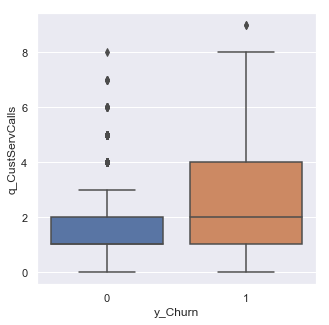

In [17]:
### Average Calls made by Churned people is much higher than stay
rcParams['figure.figsize'] =5,5
sns.boxplot(x='y_Churn',y='q_CustServCalls',data=df1)

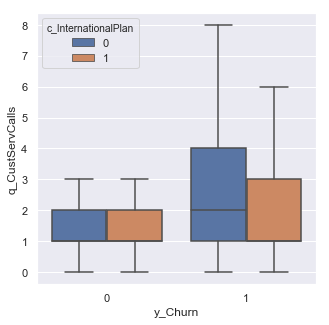

In [13]:
sns.boxplot(x='y_Churn',y='q_CustServCalls',data=df1,hue='c_InternationalPlan',sym="")

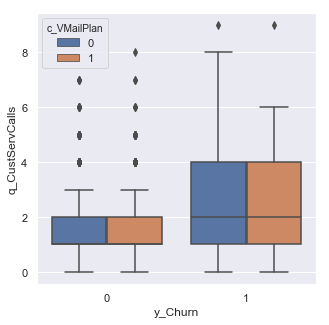

In [14]:
sns.boxplot(x='y_Churn',y='q_CustServCalls',data=df1,hue='c_VMailPlan')

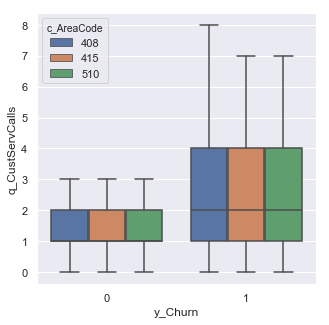

In [52]:
sns.boxplot(x='y_Churn',y='q_CustServCalls',data=df1,hue='c_AreaCode',sym="")

In [ ]:
#Generally churners call customer service more- and people with no int plan call high compared to with int plan
#There is no differnce in area code and with or without vmail plan as compared to customer services.

## Usage Analysis - No Of Calls made

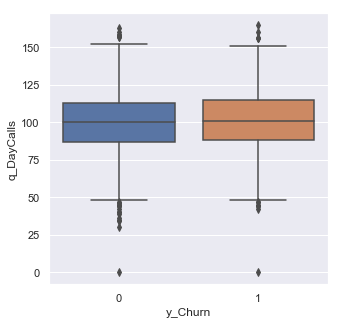

In [18]:
# No difference usage - no. of Day calls made
sns.boxplot(x='y_Churn',y='q_DayCalls',data=df1) 
plt.show()

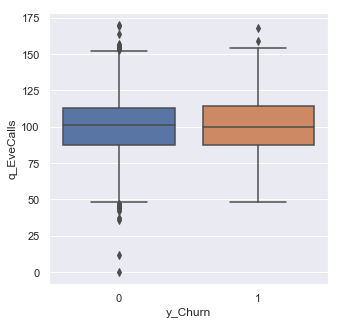

In [19]:
# No difference usage - no. of Evening calls made
sns.boxplot(x='y_Churn',y='q_EveCalls',data=df1) 

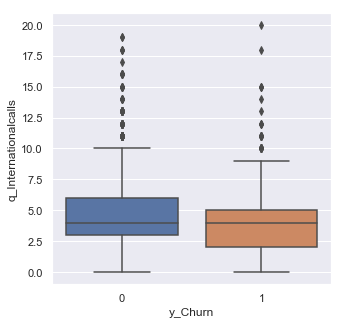

In [20]:
# No difference usage - no. of International calls made
sns.boxplot(x='y_Churn',y='q_Internationalcalls',data=df1)


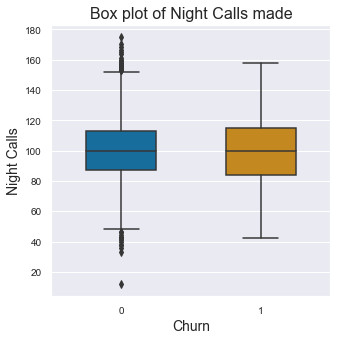

In [21]:
# No difference usage - no. of Night calls made
bplot = sns.boxplot(y='q_NightCalls', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Night Calls made",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Night Calls",fontsize=14)
bplot.tick_params(labelsize=10)

##  Usage Analysis - Total  Minutes

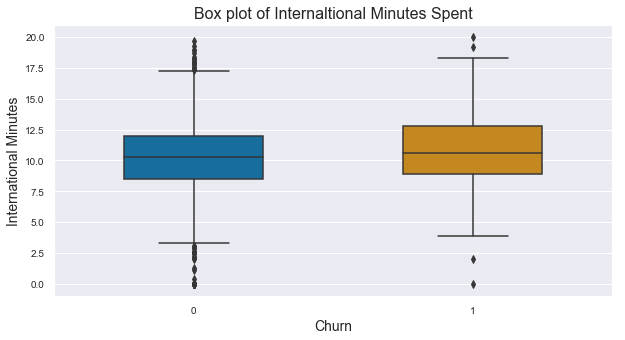

In [23]:
# No difference usage - no. of International Mins Spent
rcParams['figure.figsize'] =10,5
bplot = sns.boxplot(y='q_InternationalMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Internaltional Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("International Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

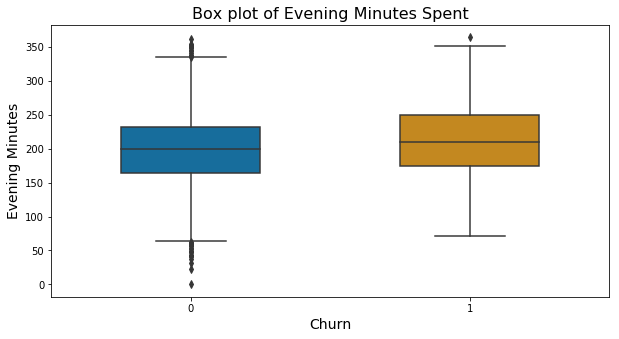

In [126]:
# No difference usage - no. of Evening Mins Spent
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_EveMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_EveMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Evening Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Evening Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

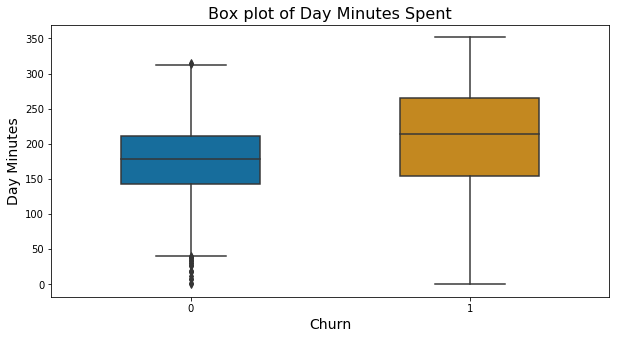

In [127]:
# No difference usage - no. of Day Mins Spent
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_DayMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_DayMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Day Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Day Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

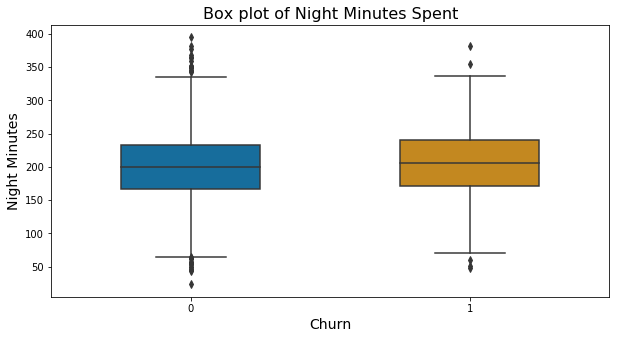

In [128]:
# No difference usage - no. of Night Mins Spent
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_NightMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_NightMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Night Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Night Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

In [55]:
df1.head()

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,...,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn,q_AccountLength_bins
0,415,0,KS,1,128,1,110,45.07,265.1,99,...,197.4,2.70,10.0,3,91,11.01,244.7,25,0,"(120.0, 140.0]"
1,415,0,OH,1,107,1,123,27.47,161.6,103,...,195.5,3.70,13.7,3,103,11.45,254.4,26,0,"(100.0, 120.0]"
2,415,0,NJ,0,137,0,114,41.38,243.4,110,...,121.2,3.29,12.2,5,104,7.32,162.6,0,0,"(120.0, 140.0]"
3,408,1,OH,0,84,2,71,50.90,299.4,88,...,61.9,1.78,6.6,7,89,8.86,196.9,0,0,"(80.0, 100.0]"
4,415,1,OK,0,75,3,113,28.34,166.7,122,...,148.3,2.73,10.1,3,121,8.41,186.9,0,0,"(60.0, 80.0]"


In [19]:
# Masked after saving
df1.to_csv("Churn2_eda.csv",index=False)